# Machine Learning Master Notes 13 - Polynomial Regression and Feature Engineering

### Prepare Environment

In [1]:
%matplotlib inline

# Essential libraries
import numpy as np
import pandas as pd

# Helper Function
import math
import random
import datetime
from datetime import datetime

# Graphical component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

# SciKit Learn Regression Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# SciKit Learn Pre-processing and Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my

### Prepare Data

In [2]:
df = pd.read_csv('./data/housing_one_var.csv')
df.head()


,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [3]:
x_train = df['sqft'].to_numpy().reshape(-1,1)
x_train[:10]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000],
       [1985],
       [1534],
       [1427],
       [1380],
       [1494]])

In [4]:
y_train = df['price']
y_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [5]:
df2 = pd.read_csv('./data/housing_two_var.txt')
df2.head()

,sqft,rm,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
y2_train = df2['price']
y2_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [7]:
X2_train = df2[['sqft','rm']]
X2_train.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


## Multiple Linear Regression: Cost Function and Gradient Descent Summary

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$


Cost Function:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \sum\limits_{j=0}^{n-1} \vec w_{j} \vec X_{j}^{(i)} \right)-\vec y^{(i)}\right)^{2}$$
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

## Feature Engineering

We can select useful features when training our models. In the housing data example, we can select features that would impact the housing price. Ask ourselves, what is the main consideration when we are buying a house? Factors such as location, any amenities around the location are also factors that could affect housing price. The process of selecting features most appropriate for our model is called **Feature Selection**.

During feature selection, we can even combined useful features. For example, if the housing data we have, consist of frontal width of the house and the depth length of the house. We can multiply them to create a new feature called housing area. In this case, we would have three features, $x_1$ as frontal width, $x_2$ as depth length and $x_3$ as the multiplication of the two features called housing area.

**Feature engineering is done by using intuition to create a new feature by combining 2 features into a new feature or by transforming existing feature.**

<div class="alert alert-block alert-info">

**Feature engineering and selection is very critical in the success of machine learning. However, it heavily depends on subject matter expertise or specific domain knowledge to select the best features for training.**
</div>

## Polynomial Features

As part of feature engineering, we can also create new features in polynomial form. We noticed that the housing data chart is not exactly linear. In fact, most real world data are not in linear form. A polynomial features (curve lines) would help to fit real world data better. 

In the following section, we would introduce techniques to create polynomial features starting with simple data.  

### One Polynomial Features (Simple Data)

As part of feature engineering, we can create polynomial features so that we can create a polynomial prediction line that fits the data better instead of using a straight line.

We can use $x^2$ or $x^3$ etc to re-engineered the $X$ features. Alternative, we can also use $\sqrt{x}$ as features.

But first lets explore some general application.

In [8]:
# Set up data from 1 to 20
x = np.arange(1,21,1).reshape(-1,1)
x.shape

(20, 1)

In [9]:
# outcome is a curve
y = (x ** 2) 

In [10]:
coef, intercept, _, _, _ = my.compute_gradient_descent(x, y, iterations=400, alpha=0.01)

iteration 399: Last cost = 5.5053e+02: intercept = -4.5960e+01: weights = [[18.7250974]]
best w [[18.7251]]
best b -45.9596


In [11]:
prediction_line = my.prediction(x,intercept,coef)

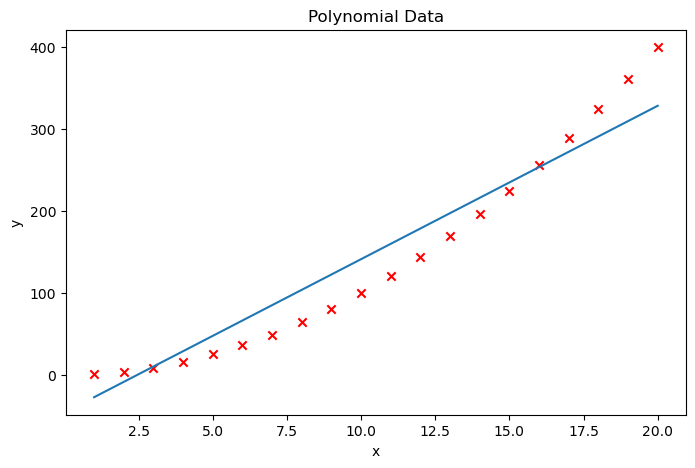

In [12]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, prediction_line, label=str('Our Linear Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

The straight line does not fit the curve data well. Let us include some polynomial features.

In [13]:
X2 = np.c_[x, x**2]
X2.shape

(20, 2)

In [14]:
coef2, intercept2, _, _, _ = my.compute_gradient_descent(X2, y, alpha=0.00001)

iteration 9999: Last cost = 2.6677e-03: intercept = -3.0348e-03: weights = [[0.02501658 0.99848507]]
best w [[0.025 ]
 [0.9985]]
best b -0.003


In [15]:
pline = my.prediction(X2,intercept2,coef2)

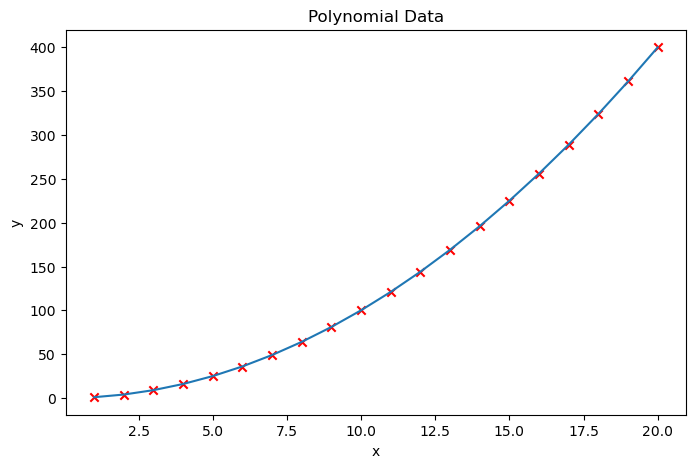

In [16]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Linear Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Three Degree Polynomial Function

What if we need more polynomial? We can create more polynomial and let the training model decide which is best. 

In [17]:
x3 = np.arange(1,21,1).reshape(-1,1)
y = x**2

In [18]:
X3_train = np.c_[x, x**2, x**3]

In [19]:
coef3, intercept3, _, _, _ = my.compute_gradient_descent(X3_train, y, iterations=50000, alpha=0.0000001)

iteration 49999: Last cost = 3.5101e-02: intercept = 1.7116e-02: weights = [[0.14178917 0.9726447  0.00108182]]
best w [[0.1418]
 [0.9726]
 [0.0011]]
best b 0.0171


**The weights that has the most weights is $x^2$ which has the weight of 0.9726 after 50,000 iterations. The weights for $x^2$ will approach 1 when we increase the iterations further.**

In [20]:
pline = my.prediction(X3_train,intercept3,coef3)

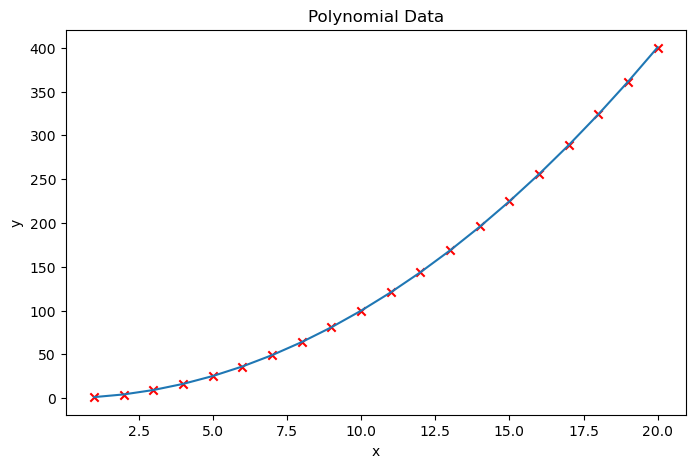

In [21]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Linear Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

**For scaled features, the coefficient will be close to each other. However, the prediction will still fits the data.**

In [22]:
X2_norm4, avg4, stddev4 = my.std_norm(X3_train)
coef4, intercept4, _, _, _ = my.compute_gradient_descent(X2_norm4, y, iterations=10000, alpha=0.001)

iteration 9999: Last cost = 5.5142e+00: intercept = 1.4349e+02: weights = [[36.83238708 43.9155807  45.47727959]]
best w [[36.8324]
 [43.9156]
 [45.4773]]
best b 143.4935


In [23]:
pline = my.prediction(X2_norm4,intercept4,coef4)

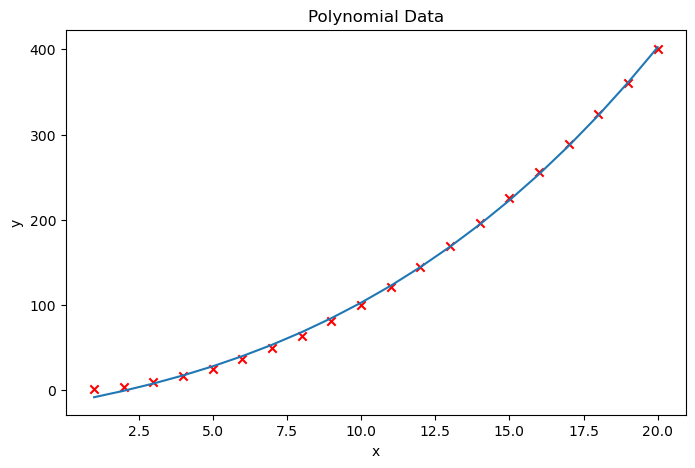

In [24]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Linear Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

## SciKit Learn Polynomial Functions

The following is generic pattern to use polynomial features in SciKit Learn

`<polynomial_name> = PolynomialFeatures()`

`<data_name_after_adding_polynomial> = <polynomial_name>.fit_transform(<original_data>)`

The default degree is 2, there is an option to include_bias. This means adding the y-intercept as first column. If it is true it will add a ones in the data array.

A degree of 2 means that SciKit Learn will construct polynomial features with power of 2 and degree 3 will corresponds to power of 3 and so on. In addition, if there is more than one features, SciKit Learn also multiply features with each other.

To learn about how the degrees are calculated, we can use `<polynomial_name>.get_feature_names_out()` to find out how these polynomial degrees are computed.

### SciKit Learn Polynomial Features Default

In [25]:
data = np.array([2,3]).reshape(1,-1)
data.shape

(1, 2)

In [26]:
polynomial_features= PolynomialFeatures()
data_poly = polynomial_features.fit_transform(data)
polynomial_features.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

The first item is 1 which is the intercept. Then it is followed by $x_0, x_1, x_0^2, (x_0 \times x_1)$ and $x_1^2$

In [27]:
# Degree of 2 is [1, a, b, a^2, ab, b^2]
data_poly

array([[1., 2., 3., 4., 6., 9.]])

### SciKit Learn Polynomial Features (1 Feature)

In [28]:
data1 = np.array([3]).reshape((1,1))
data1.shape

(1, 1)

#### Degree = 2

In [29]:
# The following chunks of code exclude y-intercept
degree = 2
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly12 = polynomial_features.fit_transform(data1)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [30]:
# Degree of 2 is [a, a^2]
data_poly12

array([[3., 9.]])

#### Degree = 3

In [31]:
# The following chunks of code exclude y-intercept
degree = 3
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly13 = polynomial_features.fit_transform(data1)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3'], dtype=object)

In [32]:
# Degree of 3 is [a, a^2, a^3]
data_poly13

array([[ 3.,  9., 27.]])

#### Degree = 4

In [33]:
# The following chunks of code exclude y-intercept
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly14 = polynomial_features.fit_transform(data1)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [34]:
# Degree of 4 is [a, a^2, a^3, a^4]
data_poly14

array([[ 3.,  9., 27., 81.]])

### SciKit Learn Polynomial Features (2 Features)

In [35]:
data2 = np.array([2,3]).reshape(1,-1)
data2.shape

(1, 2)

#### Degree = 2

In [36]:
# The following chunks of code exclude y-intercept
degree = 2
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly22 = polynomial_features.fit_transform(data2)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [37]:
# Degree of 2 is [a, b, a^2, ab, b^2]
data_poly22

array([[2., 3., 4., 6., 9.]])

#### Degree = 3

In [38]:
degree = 3
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly23 = polynomial_features.fit_transform(data2)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [39]:
# Degree of 3 is [a, b, a^2, ab, b^2, a^3, a^2*b, a*b^2, b^3]
data_poly23

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

#### Degree = 4

In [40]:
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly24 = polynomial_features.fit_transform(data2)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4'],
      dtype=object)

In [41]:
# Degree of 4 is [a, b, a^2, ab, b^2, a^3, a^2*b, a*b^2, b^3, a^4, a^3*b, a^2 * b^2, a*b^3, b^4]
data_poly24

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27., 16., 24., 36., 54.,
        81.]])

### SciKit Learn Polynomial Features (3 Features)

In [42]:
data3 = np.array([2,3,4]).reshape(1,-1)
data3

array([[2, 3, 4]])

#### Degree = 2

In [43]:
degree = 2
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly32 = polynomial_features.fit_transform(data3)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [44]:
# Degree of 2 is [a, b, c, a^2, ab, ac, b^2, bc, c^2]
data_poly32

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

#### Degree = 3

In [45]:
degree = 3
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly33 = polynomial_features.fit_transform(data3)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

In [46]:
# Degree of 3 is [a, b, c, a^2, ab, ac, b^2, bc, c^2, a^3, a^2*b, a^2*c, a*b^2, abc, a*c^2, b^3, b^2*c, b*c^2, c^3]
data_poly33

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.,  8., 12., 16., 18.,
        24., 32., 27., 36., 48., 64.]])

#### Degree = 4

In [47]:
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
data_poly34 = polynomial_features.fit_transform(data3)
polynomial_features.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4'], dtype=object)

In [48]:
# Degree of 4 is [a, b, c, a^2, ab, ac, b^2, bc, c^2, a^3, a^2*b, a^2*c, a*b^2, abc, a*c^2, b^3, b^2*c, b*c^2, c^3, a^4, a^3 * b, a^3 * c,...
# .....a^2 * b^2, a^2 * b * c, a^2 * c^2, a * b^3, a * b^2 * c, a * b * c^2, a * c^3, b^4, b^3 * c, b^2 * c^2, a * c^3, c^4]  
data_poly34

array([[  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.,   8.,  12.,
         16.,  18.,  24.,  32.,  27.,  36.,  48.,  64.,  16.,  24.,  32.,
         36.,  48.,  64.,  54.,  72.,  96., 128.,  81., 108., 144., 192.,
        256.]])

## Multiple Polynomial

The following add many more polynomial function. In such case, scaling is a must.

In [49]:
x = np.arange(1,20,1).reshape(-1,1)
y = np.cos(x/2)

### Using SciKit Learn

In [50]:
polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = polynomial_features.fit_transform(x)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15'],
      dtype=object)

In [51]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [52]:
reg = LinearRegression().fit(X_poly_norm, y)
print('w',reg.coef_)
print('b',reg.intercept_)

w [[ 6.40232433e-06 -1.40942217e+01 -1.40945299e-02  1.00704840e+02
  -2.40804179e+00 -2.66930471e+02 -7.73586917e+01  7.04013672e+02
  -7.04089149e+02  9.50857131e+02 -1.97206617e+03  2.33009233e+03
  -1.45633975e+03  4.69901046e+02 -6.25689456e+01]]
b [-0.06030231]


In [53]:
pline = reg.predict(X_poly_norm)

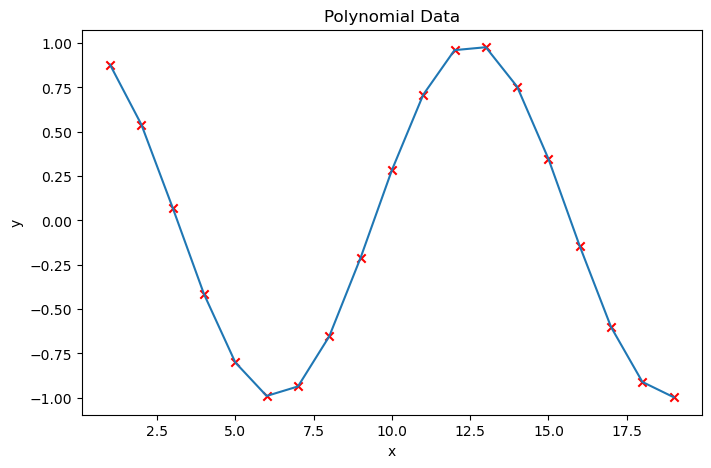

In [54]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Using Own Gradient Descent Function

In [55]:
myX_poly = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15]

In [56]:
X_norm, avg, std = my.std_norm(myX_poly)

In [57]:
# This process is long!
# Be aware
# Approx ~3 minutes

startTime = datetime.now()
print(startTime)

coef, intercept, _, _, _ = my.compute_gradient_descent(X_norm, y, iterations=5000000, alpha = 0.1, printProgress=True, printProgressRate=500000)

endTime = datetime.now()
print(endTime)
print('duration:', endTime - startTime )

2024-10-26 10:38:45.835318
iteration 0: cost = 2.1176e-01: intercept = -6.0302e-03: weights = [[-0.00861838 -0.0110967  -0.01604001 -0.02075653 -0.02448125 -0.02718584
  -0.02904701 -0.03026405 -0.03100662 -0.03140627 -0.03156111 -0.031543
  -0.03140421 -0.03118263 -0.01147726]]
iteration 500000: cost = 5.0699e-03: intercept = -6.0302e-02: weights = [[-4.17805217  2.95196284  9.89584163  1.31344283 -6.31854637 -7.9383682
  -5.16841443 -0.87282575  2.8306585   4.8455135   4.84384356  2.9553174
  -0.46959789 -5.00978054  0.05044224]]
iteration 1000000: cost = 3.0576e-03: intercept = -6.0302e-02: weights = [[ -3.31684151  -1.25854931  14.86105802   3.53641422  -8.37681147
  -11.36989327  -7.44301471  -1.01225395   4.56312273   7.52838748
    7.35625859   4.25162608  -1.22922553  -8.41994294  -0.02025191]]
iteration 1500000: cost = 2.0259e-03: intercept = -6.0302e-02: weights = [[ -2.69416891  -4.32227532  18.54167648   5.06289807  -9.95202253
  -13.83263923  -8.99068438  -1.01914416   5.8

In [58]:
pline = my.prediction(X_norm,intercept,coef)

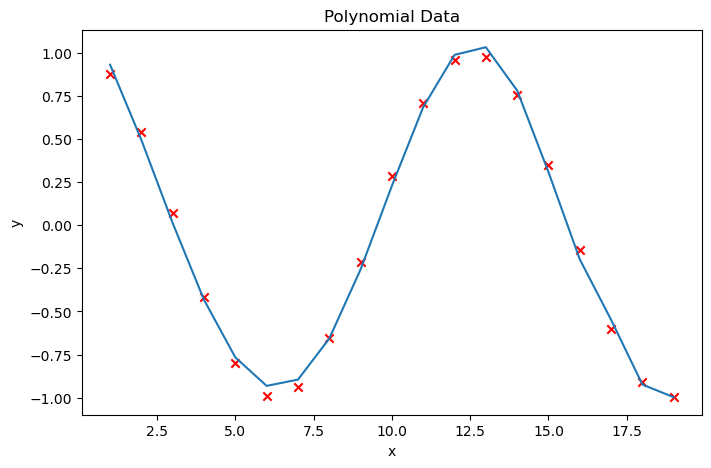

In [59]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

**Gradient Descent is not as accurate but pretty close to SciKit Learn.**

## Polynomial Regression with Random Data

**Note: We need to sort the prediction for the polynomial features as the data is random and cannot be plot**

In [60]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.6 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

### Plotting Random Data

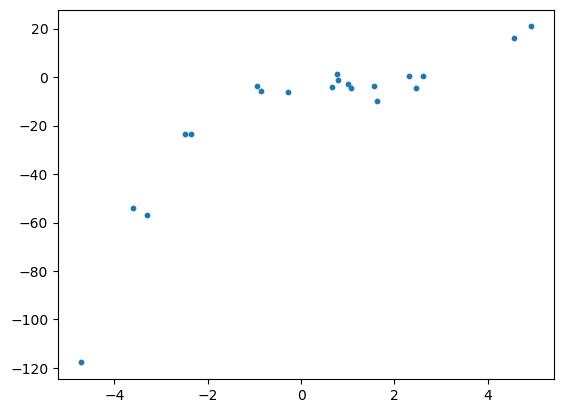

In [61]:
plt.scatter(x, y, s=10)
plt.show()

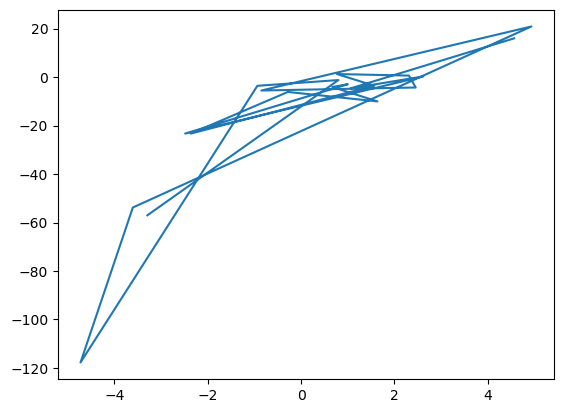

In [62]:
plt.plot(x, y)
plt.show()

In [63]:
np.c_[x,y]

array([[  -3.29215704,  -57.03654976],
       [   0.79952837,   -1.21145008],
       [  -0.93621395,   -3.58825147],
       [  -4.7226796 , -117.7565245 ],
       [  -3.60267397,  -53.8079543 ],
       [   4.93183364,   20.89691413],
       [  -0.85026525,   -5.52771177],
       [   2.45407162,   -4.28467498],
       [   2.30965656,    0.6315037 ],
       [   0.76820449,    1.26801258],
       [   1.56786929,   -3.5712216 ],
       [  -2.36282052,  -23.30903851],
       [  -0.28311318,   -6.12039199],
       [   1.63497495,  -10.03138744],
       [   0.6684103 ,   -4.08969447],
       [   0.99897702,   -2.92972572],
       [  -2.48223722,  -23.29095358],
       [   2.61547479,    0.27621777],
       [   1.0607969 ,   -4.63554115],
       [   4.56228722,   16.00338928]])

**As shown above, the data can be plot as scatter but will not work as line plot. For line plot, we need to sort the data.**

In [64]:
# sort random data for line plotting
pline = np.c_[x,y]
pline = pline[pline[:,0].argsort()]
pline

array([[  -4.7226796 , -117.7565245 ],
       [  -3.60267397,  -53.8079543 ],
       [  -3.29215704,  -57.03654976],
       [  -2.48223722,  -23.29095358],
       [  -2.36282052,  -23.30903851],
       [  -0.93621395,   -3.58825147],
       [  -0.85026525,   -5.52771177],
       [  -0.28311318,   -6.12039199],
       [   0.6684103 ,   -4.08969447],
       [   0.76820449,    1.26801258],
       [   0.79952837,   -1.21145008],
       [   0.99897702,   -2.92972572],
       [   1.0607969 ,   -4.63554115],
       [   1.56786929,   -3.5712216 ],
       [   1.63497495,  -10.03138744],
       [   2.30965656,    0.6315037 ],
       [   2.45407162,   -4.28467498],
       [   2.61547479,    0.27621777],
       [   4.56228722,   16.00338928],
       [   4.93183364,   20.89691413]])

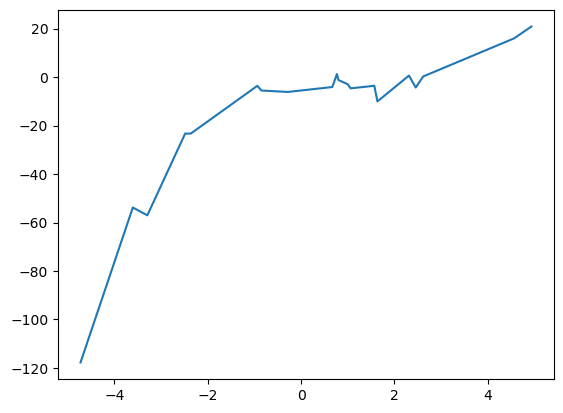

In [65]:
plt.plot(pline[:,0], pline[:,1])
plt.show()

### Apply Linear Regression (SciKit Learn)

In [66]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

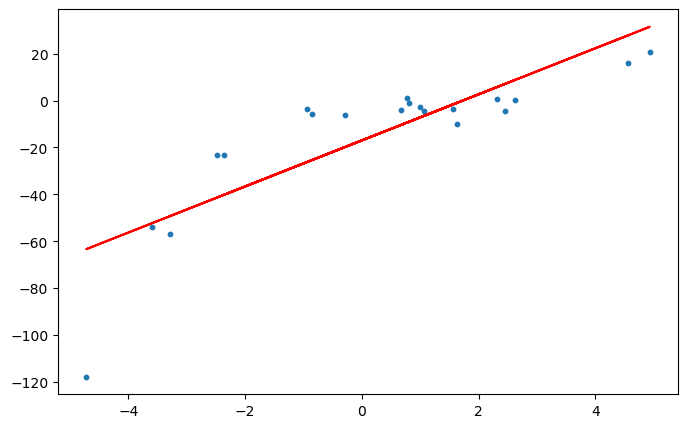

In [67]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x, y, s=10)
ax1.plot(x, y_pred, color='r')
plt.show()

In [68]:
model.coef_

array([[9.82257479]])

In [69]:
model.intercept_

array([-16.97390642])

### Applying Linear Regression (Our Function)

In [70]:
coef, intercept, _, _, _ = my.compute_gradient_descent(x, y, iterations=10000, alpha=0.01)

iteration 9999: Last cost = 1.3810e+02: intercept = -1.6974e+01: weights = [[9.82257479]]
best w [[9.8226]]
best b -16.9739


In [71]:
pline = my.prediction(x,intercept,coef)

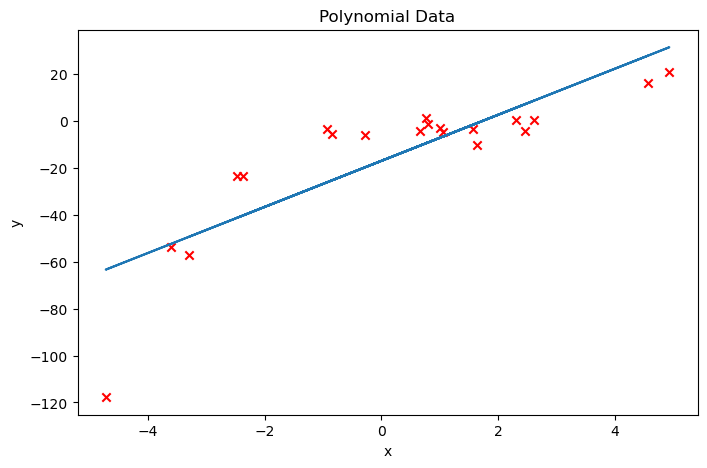

In [72]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(x, pline, label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Apply Polynomial Features (SciKit Learn)

In [73]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.6 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = x[:, np.newaxis]
y = y[:, np.newaxis]

# feature engineering to make polynomial features
polynomial_features= PolynomialFeatures(degree=4, include_bias=False)
X_poly = polynomial_features.fit_transform(X)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [74]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [75]:
# fit polynomial features
model = LinearRegression()
model.fit(X_poly_norm, y)
y_pred = model.predict(X_poly_norm)

In [76]:
model.intercept_

array([-14.10575169])

In [77]:
model.coef_

array([[  2.66833517, -12.53271309,  26.35702641,  -3.49678757]])

In [78]:
pline = np.c_[x,y_pred]
pline

array([[  -3.29215704,  -48.16866329],
       [   0.79952837,   -3.02559855],
       [  -0.93621395,   -6.03808755],
       [  -4.7226796 , -117.78321403],
       [  -3.60267397,  -59.66969911],
       [   4.93183364,   21.66054796],
       [  -0.85026525,   -5.56525777],
       [   2.45407162,   -2.42253452],
       [   2.30965656,   -2.74535174],
       [   0.76820449,   -3.01007696],
       [   1.56786929,   -3.3582532 ],
       [  -2.36282052,  -23.33631307],
       [  -0.28311318,   -3.54016834],
       [   1.63497495,   -3.35845576],
       [   0.6684103 ,   -2.96575206],
       [   0.99897702,   -3.13433784],
       [  -2.48223722,  -25.81204763],
       [   2.61547479,   -1.96147114],
       [   1.0607969 ,   -3.16903368],
       [   4.56228722,   15.28873442]])

In [79]:
pline = pline[pline[:,0].argsort()]
pline

array([[  -4.7226796 , -117.78321403],
       [  -3.60267397,  -59.66969911],
       [  -3.29215704,  -48.16866329],
       [  -2.48223722,  -25.81204763],
       [  -2.36282052,  -23.33631307],
       [  -0.93621395,   -6.03808755],
       [  -0.85026525,   -5.56525777],
       [  -0.28311318,   -3.54016834],
       [   0.6684103 ,   -2.96575206],
       [   0.76820449,   -3.01007696],
       [   0.79952837,   -3.02559855],
       [   0.99897702,   -3.13433784],
       [   1.0607969 ,   -3.16903368],
       [   1.56786929,   -3.3582532 ],
       [   1.63497495,   -3.35845576],
       [   2.30965656,   -2.74535174],
       [   2.45407162,   -2.42253452],
       [   2.61547479,   -1.96147114],
       [   4.56228722,   15.28873442],
       [   4.93183364,   21.66054796]])

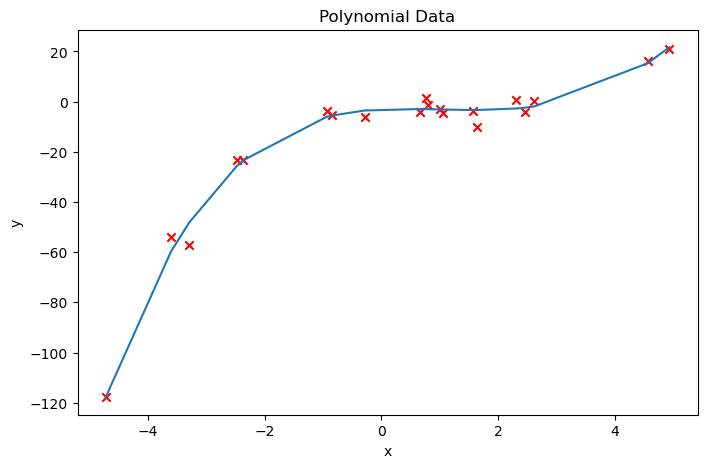

In [80]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x, y, marker='x', color='r')
ax1.plot(pline[:,0], pline[:,1])
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show
#Alternative method of sorting for ploting
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
#x, y_poly_pred = zip(*sorted_zip)
#plt.plot(x, y_poly_pred, color='m')

plt.show()

### Applying Polynomial Regression (Our Function)

In [81]:
X_poly = np.c_[x, x**2, x**3, x**4]
X_norm, avg, std = my.std_norm(X_poly)

In [82]:
coef, intercept, _, _, _ = my.compute_gradient_descent(X_norm, y, iterations=10000, alpha=0.01)

iteration 9999: Last cost = 5.5662e+00: intercept = -1.4106e+01: weights = [[  2.68090292 -12.36824553  26.35856856  -3.66267743]]
best w [[  2.6809]
 [-12.3682]
 [ 26.3586]
 [ -3.6627]]
best b -14.1058


In [83]:
y_pred = my.prediction(X_norm,intercept,coef)

In [84]:
pline = np.c_[x,y_pred]
pline = pline[pline[:,0].argsort()]

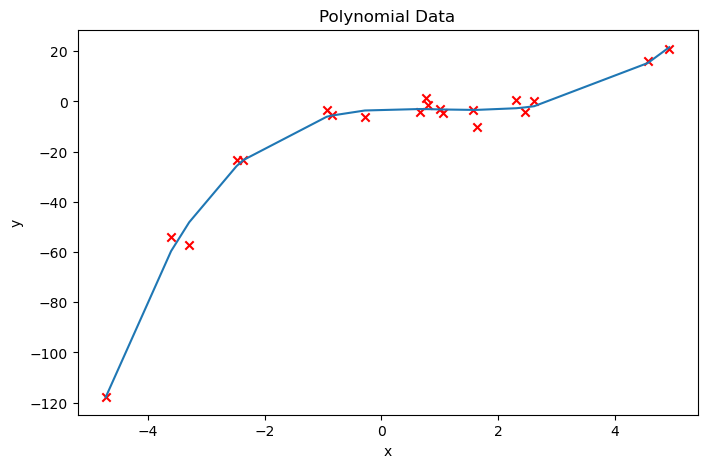

In [85]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x,y, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

## Applying Polynomial Regression to Housing Data with 1 Feature

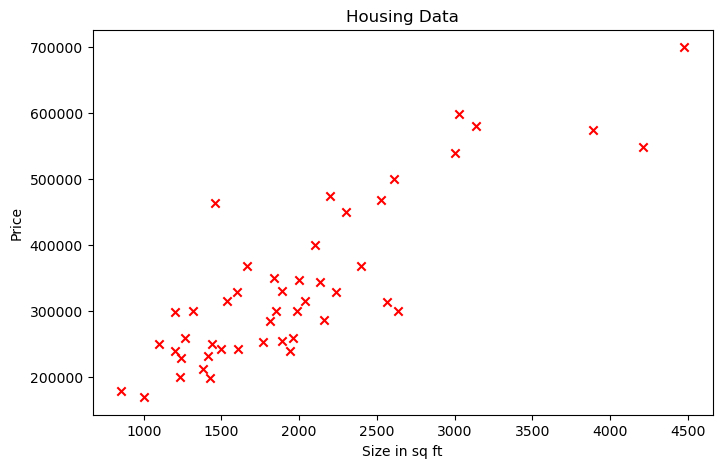

In [86]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train,y_train, marker='x', c='r')
ax1.set_title('Housing Data')
ax1.set_xlabel('Size in sq ft')
ax1.set_ylabel('Price')
plt.show()

### Linear Regression (SciKit Learn)

In [87]:
std_scaler = StandardScaler()
x_norm = std_scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_norm,y_train)
y_pred = reg.predict(x_norm)

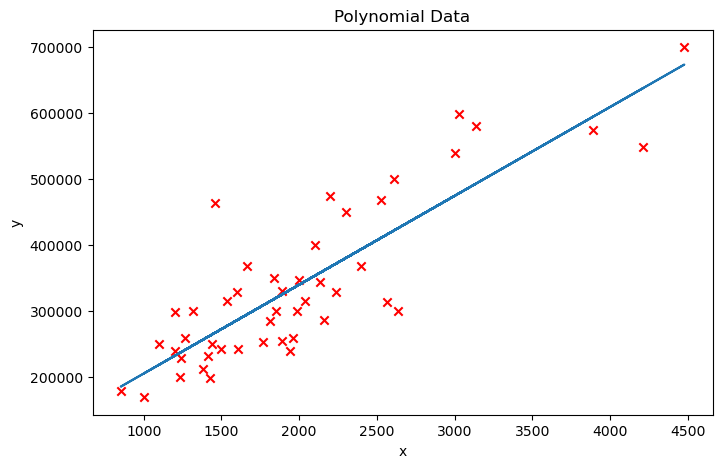

In [88]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train, y_train, marker='x', c='r')
ax1.plot(x_train, y_pred, label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Linear Regression (our function)

In [89]:
x_norm, avg, stddev = my.std_norm(x_train)
coef, intercept, _, _, _ = my.compute_gradient_descent(x_norm, y_train, iterations=500, alpha=0.01)

iteration 499: Last cost = 2.0609e+09: intercept = 3.3818e+05: weights = [[105069.21204721]]
best w [[105069.212]]
best b 338175.984


In [90]:
y_pred = my.prediction(x_norm, intercept, coef)

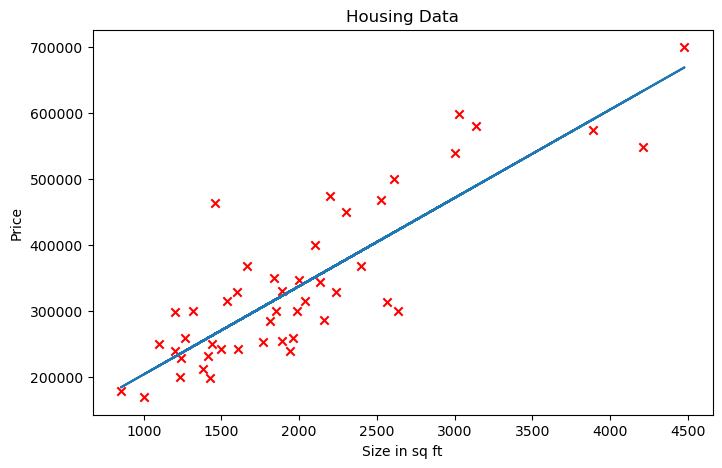

In [91]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train,y_train, marker='x', c='r')
ax1.plot(x_train, y_pred)
ax1.set_title('Housing Data')
ax1.set_xlabel('Size in sq ft')
ax1.set_ylabel('Price')
plt.show()

The straight above may not able to predict all range of housing size, housing price will not go up forever, eventually it will fattern. Lets find a polynomial that best fit the situation.

### Apply Polynomial Features (SciKit Learn)

In [92]:
polynomial_features= PolynomialFeatures(degree=4, include_bias=False)
x_poly = polynomial_features.fit_transform(x_train)

std_scaler = StandardScaler()
x_poly_norm = std_scaler.fit_transform(x_poly)

reg = LinearRegression()
reg.fit(x_poly_norm,y_train)
y_pred = reg.predict(x_poly_norm)

In [93]:
reg.coef_

array([  43850.86073205,  -21632.10691928,  311621.41243429,
       -235910.7842314 ])

In [94]:
reg.intercept_

340412.6595744681

In [95]:
x_poly_norm[:5]

array([[ 0.13141542, -0.04786014, -0.1694115 , -0.23382758],
       [-0.5096407 , -0.50835371, -0.45990406, -0.40149383],
       [ 0.5079087 ,  0.28100069,  0.08166366, -0.05924803],
       [-0.74367706, -0.64524355, -0.52987367, -0.43405951],
       [ 1.27107075,  1.08022201,  0.81518507,  0.55549866]])

In [96]:
# Setting up prediction line
pline = np.c_[x_train,y_pred]
pline = pline[pline[:,0].argsort()]

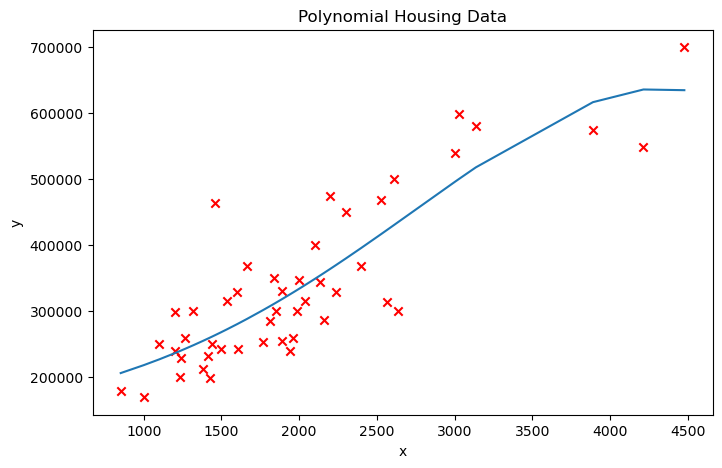

In [97]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train, y_train, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Housing Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Polynomial Regression (our function)

In [98]:
x_train_poly = np.c_[x_train, x_train**2, x_train**3, x_train**4]

In [99]:
x_poly_norm, avg, stddev = my.std_norm(x_train_poly)

In [100]:
# This process is long
# total 5 million iterations
# This is to get the result that is close to SciKit Learn
# Approx ~3-4 minutes

startTime = datetime.now()
print(startTime)

coef, intercept, _, _, _ = my.compute_gradient_descent(x_poly_norm, y_train, iterations=5000000, alpha=0.5, printProgress=True, 
                                                       printProgressRate=500000)

endTime =  datetime.now()
print(endTime)
print('duration:', endTime - startTime )

2024-10-26 10:42:02.893024
iteration 0: cost = 2.1334e+10: intercept = 1.7021e+05: weights = [[52882.06674641 51532.1685236  48519.62985064 45250.84899343]]
iteration 500000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  35843.40600212    6095.3828467   277746.37243066 -221808.49452365]]
iteration 1000000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  42674.44766473  -17558.53018551  306644.67000361 -233838.95011546]]
iteration 1500000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  43678.02832131  -21033.63848436  310890.25565287 -235606.4012771 ]]
iteration 2000000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  43825.46910472  -21544.18308949  311513.99473161 -235866.0658912 ]]
iteration 2500000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  43847.13032794  -21619.18961344  311605.63119134 -235904.21444845]]
iteration 3000000: cost = 2.0024e+09: intercept = 3.4041e+05: weights = [[  43850.31268074  -21630.20917682  311619.09393729

In [101]:
x_poly_norm[:5]

array([[ 0.13141542, -0.04786014, -0.1694115 , -0.23382758],
       [-0.5096407 , -0.50835371, -0.45990406, -0.40149383],
       [ 0.5079087 ,  0.28100069,  0.08166366, -0.05924803],
       [-0.74367706, -0.64524355, -0.52987367, -0.43405951],
       [ 1.27107075,  1.08022201,  0.81518507,  0.55549866]])

In [102]:
y_pred = my.prediction(x_poly_norm, intercept, coef)

In [103]:
pline = np.c_[x_train,y_pred]
pline = pline[pline[:,0].argsort()]

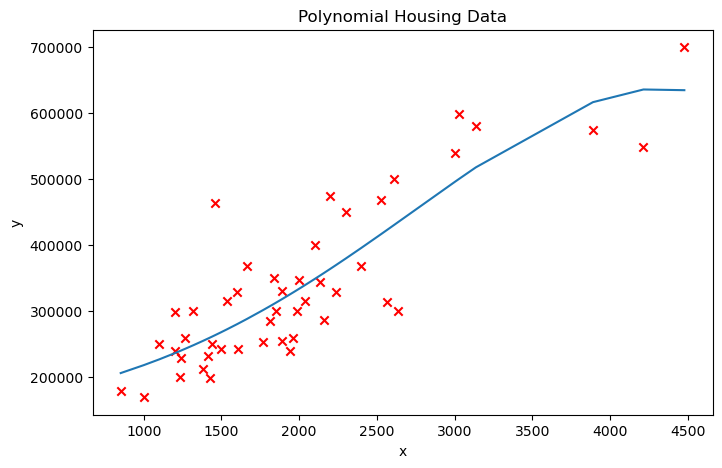

In [104]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train, y_train, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Polynomial Housing Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

In [105]:
coef

array([[  43850.86047674],
       [ -21632.10603524],
       [ 311621.41135424],
       [-235910.78378177]])

In [106]:
reg.coef_

array([  43850.86073205,  -21632.10691928,  311621.41243429,
       -235910.7842314 ])

**The weights appear slightly different, this is because the computation of SciKit Learn use normal equation and our formula uses gradient descent. If the number of iterations are large enough such as 5 million, then we can get close to SciKit Learn result.**

### Prediction First Data

In [107]:
x_train[:1]

array([[2104]])

In [108]:
# Predicting sqft of 2104

In [109]:
myAsk = 2104
myAsk_array = np.array(myAsk).reshape(-1,1)

#### Using SciKit Learn

In [110]:
ask_poly = polynomial_features.transform(myAsk_array)
ask_poly_norm = std_scaler.transform(ask_poly)

In [111]:
reg.predict(ask_poly_norm)

array([349580.85298434])

#### Using Own Function

In [112]:
# Predicting sqft of 2104 Using Own Function

In [113]:
my_ask_poly = np.c_[myAsk_array, myAsk_array**2, myAsk_array**3, myAsk_array**4]

In [114]:
coef_or, intercept_or = my.reverse_bw_std_norm(coef, intercept, avg, stddev)

In [115]:
my.prediction(my_ask_poly, intercept_or, coef_or)

array([[349580.85298632]])

### New Prediction

In [116]:
myAsk2 = 3800
myAsk_array2 = np.array(myAsk2).reshape(-1,1)

In [117]:
my_ask_poly = np.c_[myAsk_array2, myAsk_array2**2, myAsk_array2**3, myAsk_array2**4]

In [118]:
my.prediction(my_ask_poly, intercept_or, coef_or)

array([[608191.80633796]])

In [119]:
ask_poly2s = polynomial_features.transform(myAsk_array2)
ask_poly_norm2 = std_scaler.transform(ask_poly2s)
reg.predict(ask_poly_norm2)

array([608191.80635052])

## Apply Polynomial Regression to Housing Prediction with Two Features (4 Degrees)

In [120]:
X2_train.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [121]:
y2_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

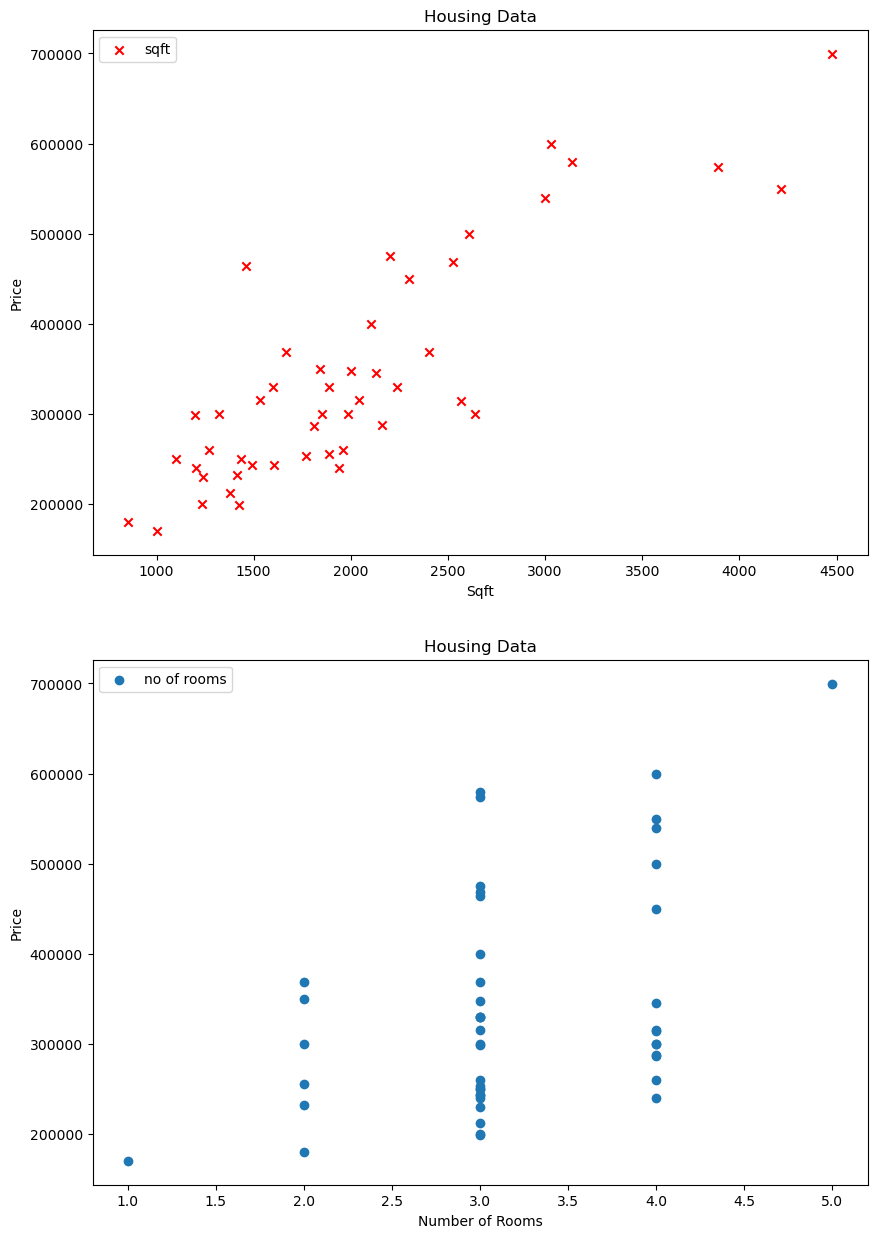

In [122]:
plt.close('all')
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 15))
ax1.scatter(X2_train['sqft'],y2_train, marker='x', c='r', label='sqft')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax2.scatter(X2_train['rm'],y2_train, label='no of rooms')
ax2.set_title('Housing Data')
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Price')
ax1.legend()
ax2.legend()
plt.show()

### SciKit Learn

In [123]:
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(X2_train)
polynomial_features.get_feature_names_out()

array(['sqft', 'rm', 'sqft^2', 'sqft rm', 'rm^2', 'sqft^3', 'sqft^2 rm',
       'sqft rm^2', 'rm^3', 'sqft^4', 'sqft^3 rm', 'sqft^2 rm^2',
       'sqft rm^3', 'rm^4'], dtype=object)

In [124]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [125]:
reg = LinearRegression()
reg.fit(X_poly_norm,y2_train)
y_pred = reg.predict(X_poly_norm)

In [126]:
reg.coef_

array([ 1368338.22235594,  -192155.2105068 , -5528805.11044952,
         602618.20211105,   972077.70887951,  6069806.56169966,
        2728453.67084081, -2477559.47571174, -1263646.99627753,
       -1777330.22601154, -3545112.56593691,  2569113.34064601,
        -354354.13155911,   923185.7779393 ])

In [127]:
reg.intercept_

340412.65957446955

In [128]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

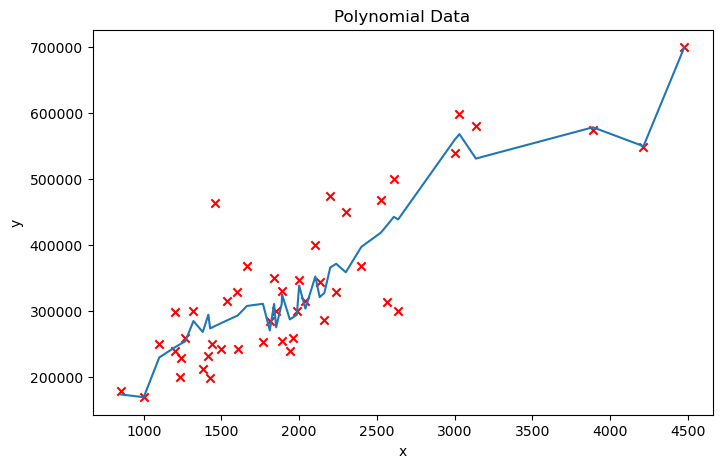

In [129]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y_train, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1])
ax1.set_title('Polynomial Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Gradient Descent Function (Replicate Same Function Similar to SciKit Learn Polynomial Formula)

In [130]:
polynomial_features.get_feature_names_out()

array(['sqft', 'rm', 'sqft^2', 'sqft rm', 'rm^2', 'sqft^3', 'sqft^2 rm',
       'sqft rm^2', 'rm^3', 'sqft^4', 'sqft^3 rm', 'sqft^2 rm^2',
       'sqft rm^3', 'rm^4'], dtype=object)

In [131]:
X2_train_poly = np.c_[X2_train['sqft'], X2_train['rm'], X2_train['sqft']**2, X2_train['sqft']*X2_train['rm'], X2_train['rm']**2, 
                X2_train['sqft']**3, X2_train['sqft']**2 * X2_train['rm'], X2_train['sqft'] * X2_train['rm']**2,
                X2_train['rm']**3, X2_train['sqft']**4, X2_train['sqft']**3 * X2_train['rm'], X2_train['sqft']**2 * X2_train['rm']**2,
                X2_train['sqft'] * X2_train['rm']**3, X2_train['rm']**4]

In [132]:
X2_train_poly.shape

(47, 14)

In [133]:
X2_norm_poly, avg, stddev = my.std_norm(X2_train_poly)
coef, intercept, _, _, _ = my.compute_gradient_descent(X2_norm_poly, y2_train, iterations=1000000, alpha=0.1, printProgress=True, 
                                                       printProgressRate=100000)

iteration 0: cost = 5.0158e+10: intercept = 3.4041e+04: weights = [[10576.41334928  5470.88217559 10306.43370472  9777.38803044
   5687.16795376  9703.92597013  9800.03154356  8900.00917652
   5849.25484819  9050.16979869  9208.00623881  9062.8165974
   8231.83502318  5982.30830537]]
iteration 100000: cost = 1.6681e+09: intercept = 3.4041e+05: weights = [[  28955.837407    127908.85890844  195169.79552403 -304960.76915584
   -19317.29436643  378016.32277426    5786.82848429   -6723.39214609
  -106511.67404279 -299804.88785764 -291548.95549592  135124.96347844
   376471.88910314 -116898.06133161]]
iteration 200000: cost = 1.6572e+09: intercept = 3.4041e+05: weights = [[ 109435.21492673  114601.09857014   60035.45859155 -429272.85226796
    27354.09576889  562498.1368094    15440.51253593   26238.26370604
   -66019.38577444 -335930.58776945 -389781.73323608  165101.98734056
   459263.19515649 -212223.69641865]]
iteration 300000: cost = 1.6504e+09: intercept = 3.4041e+05: weights = [[ 171

In [134]:
y2_pred = my.prediction(X2_norm_poly, intercept, coef)

In [135]:
pline1 = np.c_[X2_train['sqft'],y2_pred]
pline1 = pline1[pline1[:,0].argsort()]

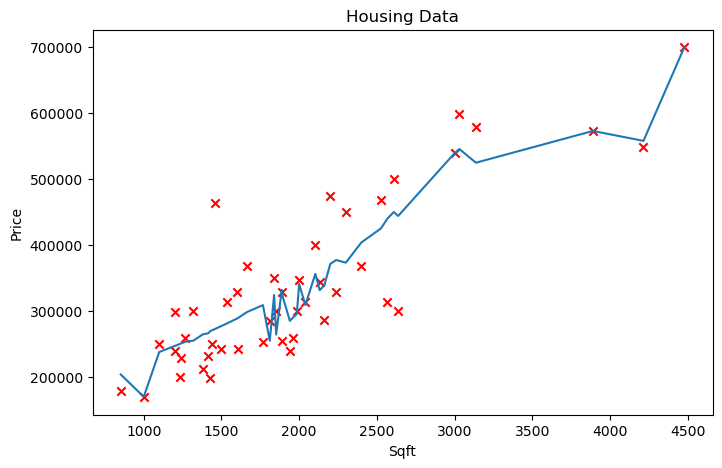

In [136]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y2_train, marker='x', c='r')
ax1.plot(pline1[:,0], pline1[:,1])
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
plt.show()

**The exact coefficient may not be as accurate as SciKit Learn without higher iterations but the shape of the curve is similar.**

### Predict First Housing Prices with Square Foot and Number of Rooms

In [137]:
sqft = 2104
rm = 3
myAsk = np.array([[sqft],[rm]]).reshape((1,2))
myAsk.shape

(1, 2)

In [138]:
myAsk= pd.DataFrame(myAsk, columns=['sqft','rm'])
myAsk

,sqft,rm
0,2104,3


#### Gradient Descent Function

In [139]:
myAsk_poly = np.c_[myAsk['sqft'], myAsk['rm'], myAsk['sqft']**2, myAsk['sqft']*myAsk['rm'], myAsk['rm']**2, 
                myAsk['sqft']**3, myAsk['sqft']**2 * myAsk['rm'], myAsk['sqft'] * myAsk['rm']**2,
                myAsk['rm']**3, myAsk['sqft']**4, myAsk['sqft']**3 * myAsk['rm'], myAsk['sqft']**2 * myAsk['rm']**2,
                myAsk['sqft'] * myAsk['rm']**3, myAsk['rm']**4]

In [140]:
myAsk_poly.shape

(1, 14)

In [141]:
coef_or, intercept_or = my.reverse_bw_std_norm(coef, intercept, avg, stddev)

In [142]:
my.prediction(myAsk_poly,intercept_or,coef_or)

array([[356816.4546819]])

In [143]:
y2_pred[0]

array([356816.4546819])

#### SciKit Learn

In [144]:
myAsk

,sqft,rm
0,2104,3


In [145]:
ask_poly = polynomial_features.transform(myAsk)
ask_poly_norm = std_scaler.transform(ask_poly)
ask_pred = reg.predict(ask_poly_norm)
ask_pred

array([352728.72396839])

In [146]:
y_pred[0]

352728.7239683946

**The prediction between our gradient descent function and SciKit Learn is different. This is due to the fact that gradient descent will need many more iterations to reach convergence that is similar to SciKit Learn regression.**

### Predict New Housing Prices with Square Foot and Number of Rooms

In [147]:
# New query
mysqft = 3800
rooms = 4
myAsk = np.array([mysqft,rooms]).reshape(1,2)

In [148]:
myAsk= pd.DataFrame(myAsk, columns=['sqft','rm'])
myAsk

,sqft,rm
0,3800,4


In [149]:
ask_poly = np.c_[myAsk['sqft'], myAsk['rm'], myAsk['sqft']**2, myAsk['sqft']*myAsk['rm'], myAsk['rm']**2, 
                myAsk['sqft']**3, myAsk['sqft']**2 * myAsk['rm'], myAsk['sqft'] * myAsk['rm']**2,
                myAsk['rm']**3, myAsk['sqft']**4, myAsk['sqft']**3 * myAsk['rm'], myAsk['sqft']**2 * myAsk['rm']**2,
                myAsk['sqft'] * myAsk['rm']**3, myAsk['rm']**4]

In [150]:
my.prediction(ask_poly,intercept_or,coef_or)

array([[622372.66124388]])

In [151]:
ask_poly = polynomial_features.transform(myAsk)
ask_poly_norm = std_scaler.transform(ask_poly)
ask_pred = reg.predict(ask_poly_norm)
ask_pred

array([677217.86536582])

**The prediction between our gradient descent function and SciKit Learn is different. This is due to the fact that gradient descent will need many more iterations to reach convergence that is similar to SciKit Learn regression.**

## Apply Polynomial Regression to Housing Prediction with Two Features (2 Degrees)

### Applying SciKit Learn Polynomial Features

In [152]:
degree = 2
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(X2_train)
polynomial_features.get_feature_names_out()

array(['sqft', 'rm', 'sqft^2', 'sqft rm', 'rm^2'], dtype=object)

In [153]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [154]:
reg = LinearRegression()
reg.fit(X_poly_norm,y2_train)
y_pred = reg.predict(X_poly_norm)

In [155]:
reg.coef_

array([  52157.69593564,   76811.55577019, -104714.41251116,
        235154.65026458, -182341.06352934])

In [156]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

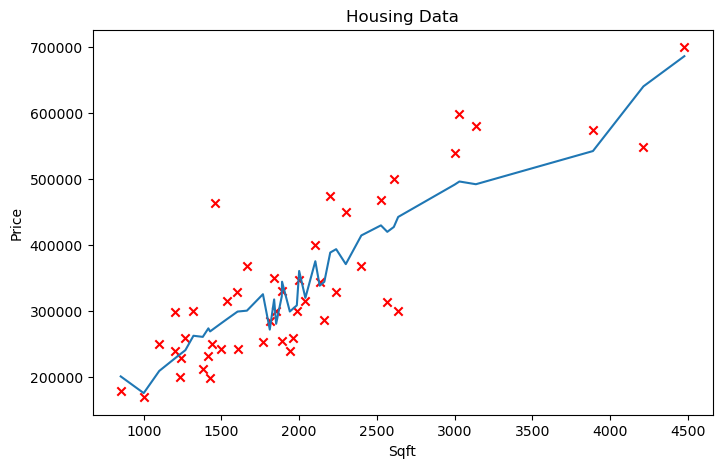

In [157]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y_train, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
plt.show()

### Applying Gradient Descent with 2 degree Polynomial Features

In [158]:
polynomial_features.get_feature_names_out()

array(['sqft', 'rm', 'sqft^2', 'sqft rm', 'rm^2'], dtype=object)

In [159]:
X2_train_poly = np.c_[X2_train['sqft'], X2_train['rm'], X2_train['sqft']**2, X2_train['sqft']*X2_train['rm'], X2_train['rm']**2]

In [160]:
X2_norm_poly, avg, stddev = my.std_norm(X2_train_poly)
coef, intercept, _, _, _ = my.compute_gradient_descent(X2_norm_poly, y2_train, iterations=1000000, alpha=0.1, printProgress=True, 
                                                       printProgressRate=500000)

iteration 0: cost = 5.1554e+10: intercept = 3.4041e+04: weights = [[10576.41334928  5470.88217559 10306.43370472  9777.38803044
   5687.16795376]]
iteration 500000: cost = 1.8770e+09: intercept = 3.4041e+05: weights = [[  52157.69593565   76811.55577018 -104714.41251113  235154.65026452
  -182341.0635293 ]]
iteration 999999: Last cost = 1.8770e+09: intercept = 3.4041e+05: weights = [[  52157.69593565   76811.55577018 -104714.41251113  235154.65026452
  -182341.0635293 ]]
best w [[  52157.6959]
 [  76811.5558]
 [-104714.4125]
 [ 235154.6503]
 [-182341.0635]]
best b 340412.6596


### Predict First Housing Prices with Square Foot and Number of Rooms

In [161]:
sqft = 2104
rm = 3
myAsk = np.array([[sqft],[rm]]).reshape((1,2))
myAsk.shape

(1, 2)

In [162]:
myAsk= pd.DataFrame(myAsk, columns=['sqft','rm'])
myAsk

,sqft,rm
0,2104,3


In [163]:
ask_poly = polynomial_features.transform(myAsk)
ask_poly_norm = std_scaler.transform(ask_poly)
ask_pred = reg.predict(ask_poly_norm)
ask_pred

array([375851.66034497])

In [164]:
ask_poly = np.c_[myAsk['sqft'], myAsk['rm'], myAsk['sqft']**2, myAsk['sqft']*myAsk['rm'], myAsk['rm']**2]

In [165]:
coef_or, intercept_or = my.reverse_bw_std_norm(coef, intercept, avg, stddev)

In [166]:
my.prediction(ask_poly,intercept_or,coef_or)

array([[375851.66034497]])

### Predict New Housing Prices with Square Foot and Number of Rooms

In [167]:
# New query
mysqft = 3800
rooms = 4
myAsk = np.array([mysqft,rooms]).reshape(1,2)

In [168]:
myAsk= pd.DataFrame(myAsk, columns=['sqft','rm'])
myAsk

,sqft,rm
0,3800,4


In [169]:
ask_poly = polynomial_features.transform(myAsk)
ask_poly_norm = std_scaler.transform(ask_poly)
ask_pred = reg.predict(ask_poly_norm)
ask_pred

array([598395.05066853])

In [170]:
ask_poly = np.c_[myAsk['sqft'], myAsk['rm'], myAsk['sqft']**2, myAsk['sqft']*myAsk['rm'], myAsk['rm']**2]

In [171]:
my.prediction(ask_poly,intercept_or,coef_or)

array([[598395.05066853]])

**Both the SciKit Learn and our gradient descent has the same prediction, this is because, at a degree of two, the features are less complex and thus easier for gradient descent to reach convergence.**

## Problem with High Degrees Polynomial and Multiple Features

In the above example, we are using very high degree polynomial with 2 features. What happen if we have more features? Let us open a new dataset with more features.

### Prepare Dataset

In [172]:
df3 = pd.read_csv('./data/housing_four_var.txt')
df3.columns = ['sqft', 'rooms', 'floor', 'age', 'price']
df3.head()

,sqft,rooms,floor,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [173]:
y3_train = df3['price']
y3_train.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

In [174]:
X3_train = df3[['sqft', 'rooms', 'floor', 'age']]
X3_train.head()

,sqft,rooms,floor,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


### Examine Current Dataset

In [175]:
X3_train.shape

(100, 4)

In [176]:
X3_train.head()

,sqft,rooms,floor,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


The current dataset has 100 data with features. Let us see what happen when we add additional polynomial features.

### Multiple Features with 4 Degree Polynomial

In [177]:
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X3_poly = polynomial_features.fit_transform(X3_train)
polynomial_features.get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age', 'sqft^2', 'sqft rooms',
       'sqft floor', 'sqft age', 'rooms^2', 'rooms floor', 'rooms age',
       'floor^2', 'floor age', 'age^2', 'sqft^3', 'sqft^2 rooms',
       'sqft^2 floor', 'sqft^2 age', 'sqft rooms^2', 'sqft rooms floor',
       'sqft rooms age', 'sqft floor^2', 'sqft floor age', 'sqft age^2',
       'rooms^3', 'rooms^2 floor', 'rooms^2 age', 'rooms floor^2',
       'rooms floor age', 'rooms age^2', 'floor^3', 'floor^2 age',
       'floor age^2', 'age^3', 'sqft^4', 'sqft^3 rooms', 'sqft^3 floor',
       'sqft^3 age', 'sqft^2 rooms^2', 'sqft^2 rooms floor',
       'sqft^2 rooms age', 'sqft^2 floor^2', 'sqft^2 floor age',
       'sqft^2 age^2', 'sqft rooms^3', 'sqft rooms^2 floor',
       'sqft rooms^2 age', 'sqft rooms floor^2', 'sqft rooms floor age',
       'sqft rooms age^2', 'sqft floor^3', 'sqft floor^2 age',
       'sqft floor age^2', 'sqft age^3', 'rooms^4', 'rooms^3 floor',
       'rooms^3 age', 'rooms^2 floor^2', 'rooms^2 flo

In [178]:
X3_poly.shape

(100, 69)

**With just 4 degrees polynomial, our number of columns increase from 4 to 69.**

### Multiple Features with 10 Degree Polynomial

In [179]:
degree = 10
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X3_poly = polynomial_features.fit_transform(X3_train)
polynomial_features.get_feature_names_out()

array(['sqft', 'rooms', 'floor', 'age', 'sqft^2', 'sqft rooms',
       'sqft floor', 'sqft age', 'rooms^2', 'rooms floor', 'rooms age',
       'floor^2', 'floor age', 'age^2', 'sqft^3', 'sqft^2 rooms',
       'sqft^2 floor', 'sqft^2 age', 'sqft rooms^2', 'sqft rooms floor',
       'sqft rooms age', 'sqft floor^2', 'sqft floor age', 'sqft age^2',
       'rooms^3', 'rooms^2 floor', 'rooms^2 age', 'rooms floor^2',
       'rooms floor age', 'rooms age^2', 'floor^3', 'floor^2 age',
       'floor age^2', 'age^3', 'sqft^4', 'sqft^3 rooms', 'sqft^3 floor',
       'sqft^3 age', 'sqft^2 rooms^2', 'sqft^2 rooms floor',
       'sqft^2 rooms age', 'sqft^2 floor^2', 'sqft^2 floor age',
       'sqft^2 age^2', 'sqft rooms^3', 'sqft rooms^2 floor',
       'sqft rooms^2 age', 'sqft rooms floor^2', 'sqft rooms floor age',
       'sqft rooms age^2', 'sqft floor^3', 'sqft floor^2 age',
       'sqft floor age^2', 'sqft age^3', 'rooms^4', 'rooms^3 floor',
       'rooms^3 age', 'rooms^2 floor^2', 'rooms^2 flo

In [180]:
X3_poly.shape

(100, 1000)

**With 10 degrees polynomial, our number of columns increase from 4 to 1000. This will seriously impact the performance**

### Multiple Features with 20 Degree Polynomial

In [181]:
degree = 20
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X3_poly = polynomial_features.fit_transform(X3_train)
polynomial_features.get_feature_names_out()

array(['sqft', 'rooms', 'floor', ..., 'floor^2 age^18', 'floor age^19',
       'age^20'], dtype=object)

In [182]:
X3_poly.shape

(100, 10625)

**For 20 degrees polynomial, our number of columns increase from 4 to 10625.**

<div class="alert alert-block alert-warning">

Please note that for every increase in the number of features, with the same degrees of polynomial, the number of columns will increase dramatically. A typical polynomial degrees would be depending on number of features you have.

</div>

## Problem with High Degrees Polynomial Regression (Housing Data Application)

In this case we applied 40 degree so that the cost will be much lower. It will be harder for gradient descent to reach convergence, hence, we will be running only on SciKit Learning Regression Model.

In [183]:
degree = 40
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(X2_train)

In [184]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [185]:
reg = LinearRegression()
reg.fit(X_poly_norm,y2_train)
y_pred = reg.predict(X_poly_norm)

In [186]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

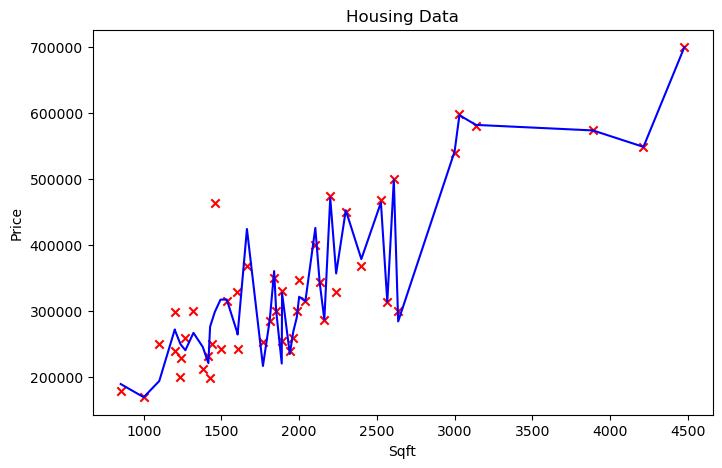

In [187]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train, y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], c='b', label='Actual sqft with Trained Housing Price')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
plt.show()

### Prediction from 1500 to 4000 sqft 

Now, we attempt to predict the housing price from 2000 sqft to 4000 sqft with increment of 100 sqft. For number of rooms, we keep it at 3 rooms.

In [188]:
newAsk = np.arange(1500, 4000, 100).reshape(-1,1)
newAsk.shape

(25, 1)

In [189]:
rooms = np.ones((newAsk.shape[0],1)) * 3

In [190]:
newAsk = np.c_[newAsk, rooms]

In [191]:
newAsk.shape

(25, 2)

In [192]:
newAsk[:5]

array([[1500.,    3.],
       [1600.,    3.],
       [1700.,    3.],
       [1800.,    3.],
       [1900.,    3.]])

In [193]:
newAsk= pd.DataFrame(newAsk, columns=['sqft','rm'])

In [194]:
newAsk_poly = polynomial_features.transform(newAsk)
newAsk_poly_norm = std_scaler.transform(newAsk_poly)

In [195]:
newAsk_pred = reg.predict(newAsk_poly_norm)

In [196]:
newpline = np.c_ [newAsk['sqft'],newAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

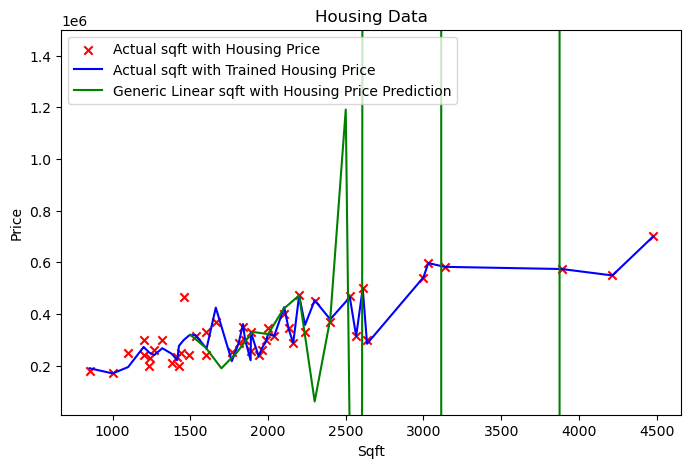

In [197]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train, y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], c='b', label='Actual sqft with Trained Housing Price')
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(10000,1500000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()


The last few housing size seems to shoot up and down that is off the charts. Let us take a look at the prediction numbers.

In [198]:
newAsk_pred

array([ 3.19252674e+05,  2.69074674e+05,  1.89654674e+05,  2.51208674e+05,
        3.30598674e+05,  3.22042674e+05,  4.19576674e+05,  4.71816674e+05,
        6.13866738e+04,  3.79080674e+05,  1.19119667e+06, -3.73624133e+06,
        7.18316367e+07,  9.29522549e+08,  4.98652724e+09,  1.53220393e+10,
        1.74798967e+10, -1.06195980e+11, -8.55459560e+11, -3.81167162e+12,
       -1.29309618e+13, -3.56102292e+13, -7.81775719e+13, -1.14878773e+14,
        3.72064610e+13])

**There are very large prediction numbers and also negative numbers. Let us breakdown the chart into smaller portion so that we can see the scales.**

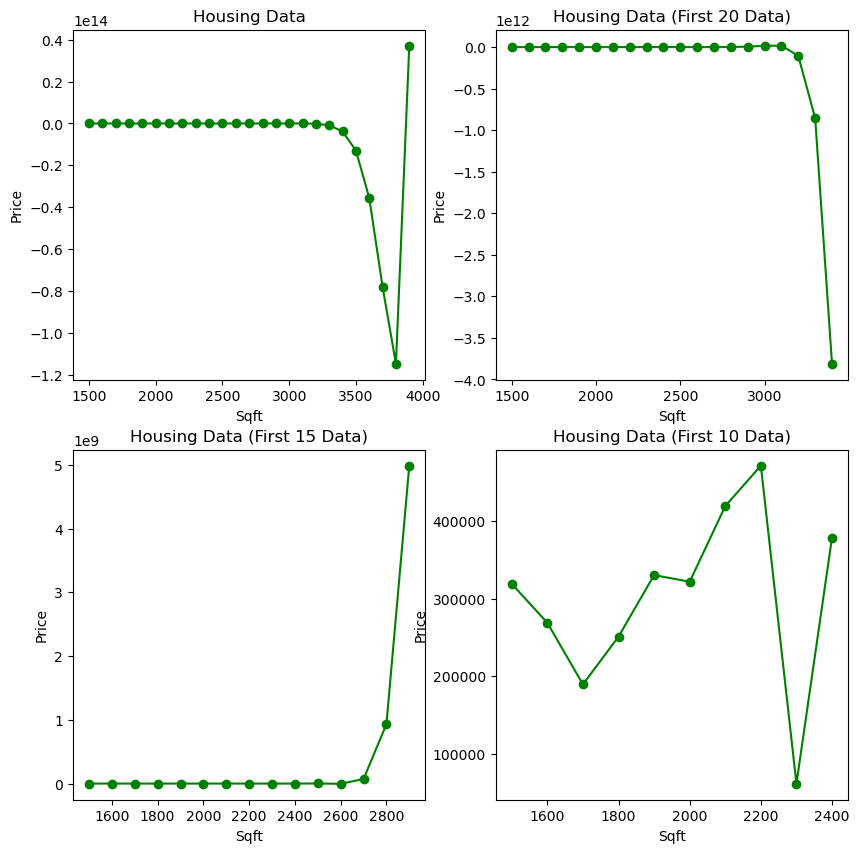

In [199]:
plt.close('all')
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.plot(newAsk['sqft'][:], newAsk_pred[:], marker='o', c='g')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')

ax2.plot(newAsk['sqft'][:20], newAsk_pred[:20], marker='o', c='g')
ax2.set_title('Housing Data (First 20 Data)')
ax2.set_xlabel('Sqft')
ax2.set_ylabel('Price')

ax3.plot(newAsk['sqft'][:15], newAsk_pred[:15], marker='o', c='g')
ax3.set_title('Housing Data (First 15 Data)')
ax3.set_xlabel('Sqft')
ax3.set_ylabel('Price')

ax4.plot(newAsk['sqft'][:10], newAsk_pred[:10], marker='o', c='g')
ax4.set_title('Housing Data (First 10 Data)')
ax4.set_xlabel('Sqft')
ax4.set_ylabel('Price')

plt.show()

**With a polynomial degree of 40. We have some negative prediction on certain housing size and some housing prediction that are off the chart. This does not make sense as housing price seldom goes negative and it does not go very high for larger size. As the polynomial degrees are high, it tends to oscillate when there is no training data to guide the prediction.**

#### 4 Degree Polynomial

Let us try fitting with **4 degree polynomial**.

In [200]:
degree = 4
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(X2_train)

In [201]:
std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

In [202]:
reg = LinearRegression()
reg.fit(X_poly_norm,y2_train)
y_pred = reg.predict(X_poly_norm)

In [203]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

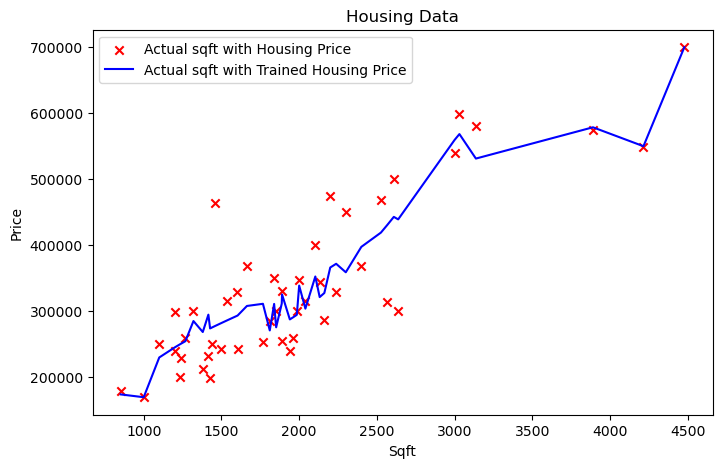

In [204]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], c='b', label='Actual sqft with Trained Housing Price')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [205]:
newAsk_poly = polynomial_features.transform(newAsk)
newAsk_poly_norm = std_scaler.transform(newAsk_poly)

In [206]:
newAsk_pred = reg.predict(newAsk_poly_norm)

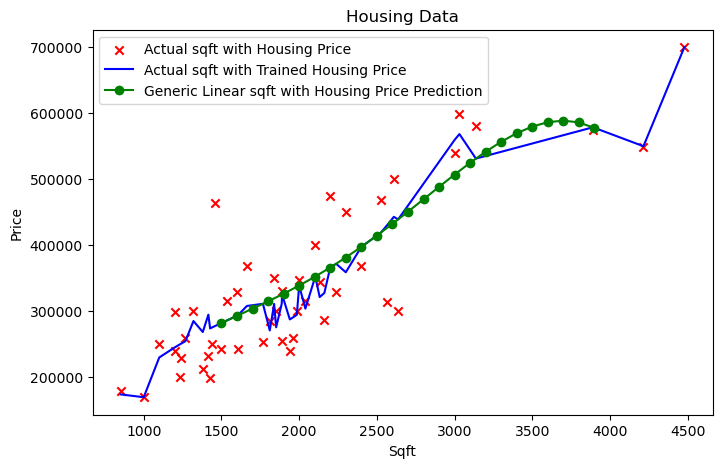

In [207]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y2_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], c='b', label='Actual sqft with Trained Housing Price')
ax1.plot(newAsk['sqft'][:], newAsk_pred[:], marker='o',c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

It seems that a 4 degree polynomial function also peak and oscillate downwards but not as much compared to 40 degrees polynomial.

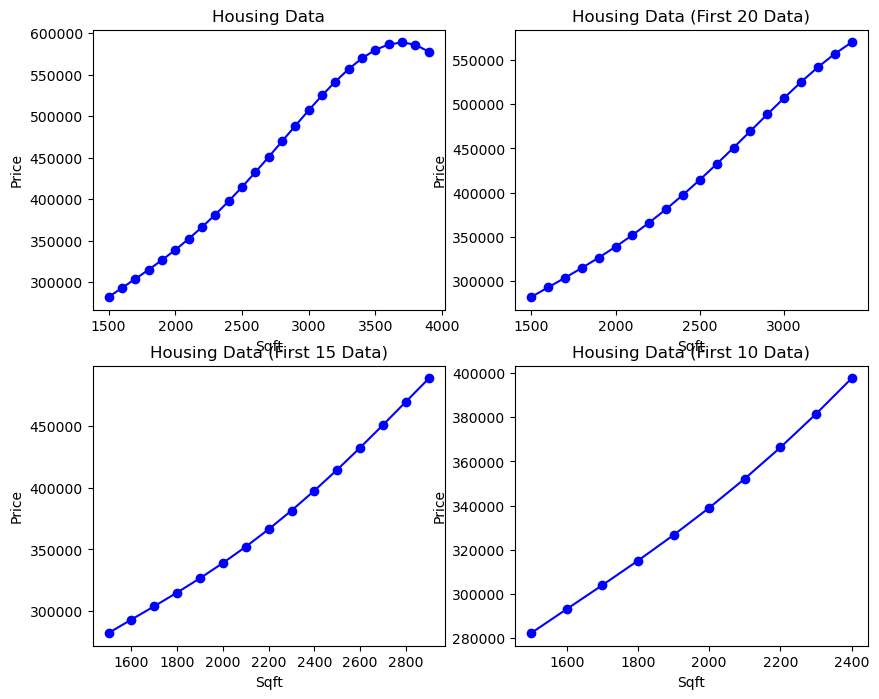

In [208]:
plt.close('all')
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 8))
ax1.plot(newAsk['sqft'][:], newAsk_pred[:], marker='o', c='b')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')

ax2.plot(newAsk['sqft'][:20], newAsk_pred[:20], marker='o', c='b')
ax2.set_title('Housing Data (First 20 Data)')
ax2.set_xlabel('Sqft')
ax2.set_ylabel('Price')

ax3.plot(newAsk['sqft'][:15], newAsk_pred[:15], marker='o', c='b')
ax3.set_title('Housing Data (First 15 Data)')
ax3.set_xlabel('Sqft')
ax3.set_ylabel('Price')

ax4.plot(newAsk['sqft'][:10], newAsk_pred[:10], marker='o', c='b')
ax4.set_title('Housing Data (First 10 Data)')
ax4.set_xlabel('Sqft')
ax4.set_ylabel('Price')

plt.show()

It seems that we can have better prediction with lower number of degrees. The prediction curve still peaks and oscillate downwards but not as early compare to 40 degrees polynomial.

#### 2 Degree Polynomial

Lets us try 2 degree polynomial.

In [209]:
degree = 2
polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
X_poly = polynomial_features.fit_transform(X2_train)

std_scaler = StandardScaler()
X_poly_norm = std_scaler.fit_transform(X_poly)

reg = LinearRegression()
reg.fit(X_poly_norm,y2_train)
y_pred = reg.predict(X_poly_norm)

In [210]:
pline = np.c_[X2_train['sqft'],y_pred]
pline = pline[pline[:,0].argsort()]

newAsk_poly = polynomial_features.transform(newAsk)
newAsk_poly_norm = std_scaler.transform(newAsk_poly)

newAsk_pred = reg.predict(newAsk_poly_norm)

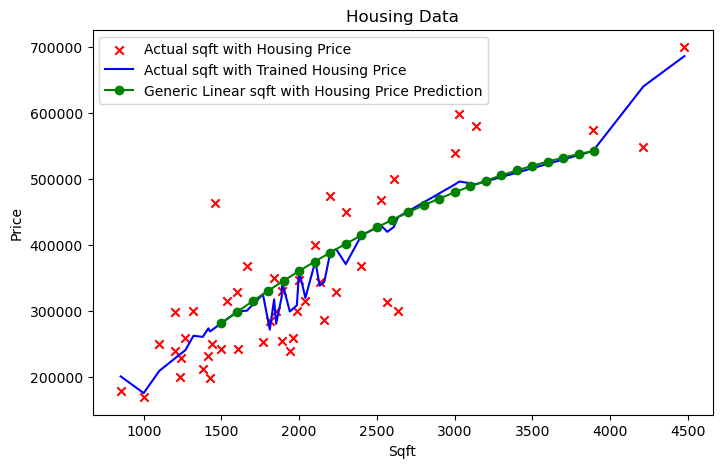

In [211]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train['sqft'], y2_train, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], c='b', label='Actual sqft with Trained Housing Price')
ax1.plot(newAsk['sqft'][:], newAsk_pred[:], marker='o',c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

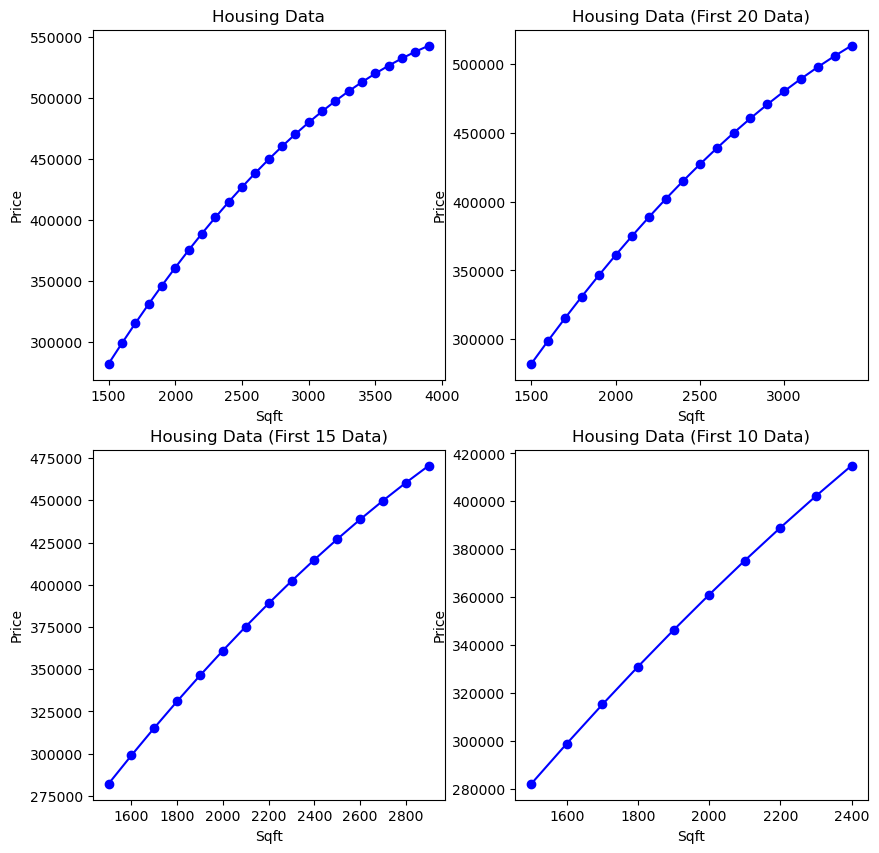

In [212]:
plt.close('all')
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.plot(newAsk['sqft'][:], newAsk_pred[:], marker='o', c='b')
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')

ax2.plot(newAsk['sqft'][:20], newAsk_pred[:20], marker='o', c='b')
ax2.set_title('Housing Data (First 20 Data)')
ax2.set_xlabel('Sqft')
ax2.set_ylabel('Price')

ax3.plot(newAsk['sqft'][:15], newAsk_pred[:15], marker='o', c='b')
ax3.set_title('Housing Data (First 15 Data)')
ax3.set_xlabel('Sqft')
ax3.set_ylabel('Price')

ax4.plot(newAsk['sqft'][:10], newAsk_pred[:10], marker='o', c='b')
ax4.set_title('Housing Data (First 10 Data)')
ax4.set_xlabel('Sqft')
ax4.set_ylabel('Price')

plt.show()

A polynomial of 2 degrees seems reasonable.

**The problem of high polynomial degrees causing prediction issue is called over-fitting problem, which we will be discussing in the next section.**

# End